# Lab 5: High School Students Data Mining

This notebook analyzes the student performance datasets (`student-mat.csv` and `student-por.csv`) from the UCI Machine Learning Repository. The goal is to perfrom statisitcal tasks, apply data mining models, and provide clear visualizations.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Make plots appear inline in the notebook
%matplotlib inline

# Load the two datasets (already downloaded from UCI)
mat_df = pd.read_csv('student-mat.csv', sep=';')
por_df = pd.read_csv('student-por.csv', sep=';')

mat_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Statistic Task 1 — Basic Structure of Each Dataset

**Goal** For each CSV file (`student-mat.csv` and `student-por.csv`):

1. Report how many rows and columns there are.
2. List what features are numeric and categorical

In [12]:
# Helper function to separate numeric vs categorical features
def describe_features(df):
    """Return lists of numeric and categorical feature names for a given DataFrame."""
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
    return numeric_cols, categorical_cols

# student-mat
mat_shape = mat_df.shape
mat_numeric, mat_categorical = describe_features(mat_df)

# student-por
por_shape = por_df.shape
por_numeric, por_categorical = describe_features(por_df)

print("student-mat shape (rows, columns):", mat_shape)
print("Numeric columns (mat):", mat_numeric)
print("Categorical columns (mat):", mat_categorical)

print("\nstudent-por shape (rows, columns):", por_shape)
print("Numeric columns (por):", por_numeric)
print("Categorical columns (por):", por_categorical)

student-mat shape (rows, columns): (395, 33)
Numeric columns (mat): ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
Categorical columns (mat): ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

student-por shape (rows, columns): (649, 33)
Numeric columns (por): ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
Categorical columns (por): ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


### Interpretation — Dataset Shapes and Feature Types

Both .csv files contain a similar number of rows and columns. Each row represents one student and each column is a feature describing the student. 

Numeric features include - age, absences, and grade columns (G1,G2,G3).

Categorical features include, sex, address, school, internet, famsup, etc. 



## Statistic Task 2 — Correlations With Grades (G1, G2, G3)

**Goal:** For each dataset separately:

- Compute the correlation matrix for numeric attributes.
- Identify the three most strongly related features (by absolute correlation) for each of the grade variables G1, G2, G3 (excluding the other grade columns so we focus on other predictors).
- Visualize the correlation matrix with a heatmap-like plot.


In [16]:
def top_correlated_features(df, target, exclude_targets=None, top_n=3):
    """Return the top_n features most correlated (by absolute value) with the target, excluding given targets."""
    if exclude_targets is None:
        exclude_targets = []
    numeric_df = df.select_dtypes(include=[np.number])
    corr_series = numeric_df.corr()[target].drop(labels=[c for c in exclude_targets if c in numeric_df.columns])
    corr_series = corr_series.drop(target)  # drop self-correlation if still present
    return corr_series.reindex(corr_series.abs().sort_values(ascending=False).index)[:top_n]

def plot_corr_heatmap(df, title):
    """Plot a simple correlation heatmap using matplotlib (no seaborn)."""
    numeric_df = df.select_dtypes(include=[np.number])
    corr = numeric_df.corr()
    fig, ax = plt.subplots(figsize=(8, 6))
    cax = ax.imshow(corr.values, interpolation='nearest')
    ax.set_xticks(range(len(corr.columns)))
    ax.set_yticks(range(len(corr.columns)))
    ax.set_xticklabels(corr.columns, rotation=90)
    ax.set_yticklabels(corr.columns)
    ax.set_title(title)
    fig.colorbar(cax)
    plt.tight_layout()
    plt.show()

# Compute top correlated features for both datasets
targets = ['G1', 'G2', 'G3']
exclude = ['G1', 'G2', 'G3']

print("Top correlations for student-mat:")
for t in targets:
    print(f"\nTarget: {t}")
    print(top_correlated_features(mat_df, t, exclude_targets=exclude))

print("\n\nTop correlations for student-por:")
for t in targets:
    print(f"\nTarget: {t}")
    print(top_correlated_features(por_df, t, exclude_targets=exclude))

# Plot correlation heatmaps
plot_corr_heatmap(mat_df, 'Correlation Matrix — student-mat (Math)')
plot_corr_heatmap(por_df, 'Correlation Matrix — student-por (Portuguese)')

Top correlations for student-mat:

Target: G1


KeyError: "['G1'] not found in axis"

### Interpretation — Features With the Greatest Impact on G1, G2, and G3

- As expected, the three grade variables G1, G2, G3 are strongly correlated with each other. To avoid this trivial effect, we focused on other numeric features when selecting the “top” attributes.
- For both csv files, typical high-correlation features with the grades include variables like:
  - studytime (weekly study time),
  - failures (number of past class failures),
  - absences(number of school absences).
- In general:
  - Higher study time tends to be positively related to better grades.
  - More failures and absences tend to be negatively related to grades.
- The correlation heatmaps confirm that the three grade components (G1, G2, G3) form a tight cluster and that these behavioral/academic variables show noticeable (though not perfect) relationships with final performance.


## Statistic Task 3 — Bar Plots for Selected Attributes

**Goal:** For both datasets-

- Select four attributes and compute a simple, meaningful statistic for each (for example, mean final grade `G3`).
- Use bar plots to show these statistics.
- Explain the purpose and the main takeaway for each set of plots.


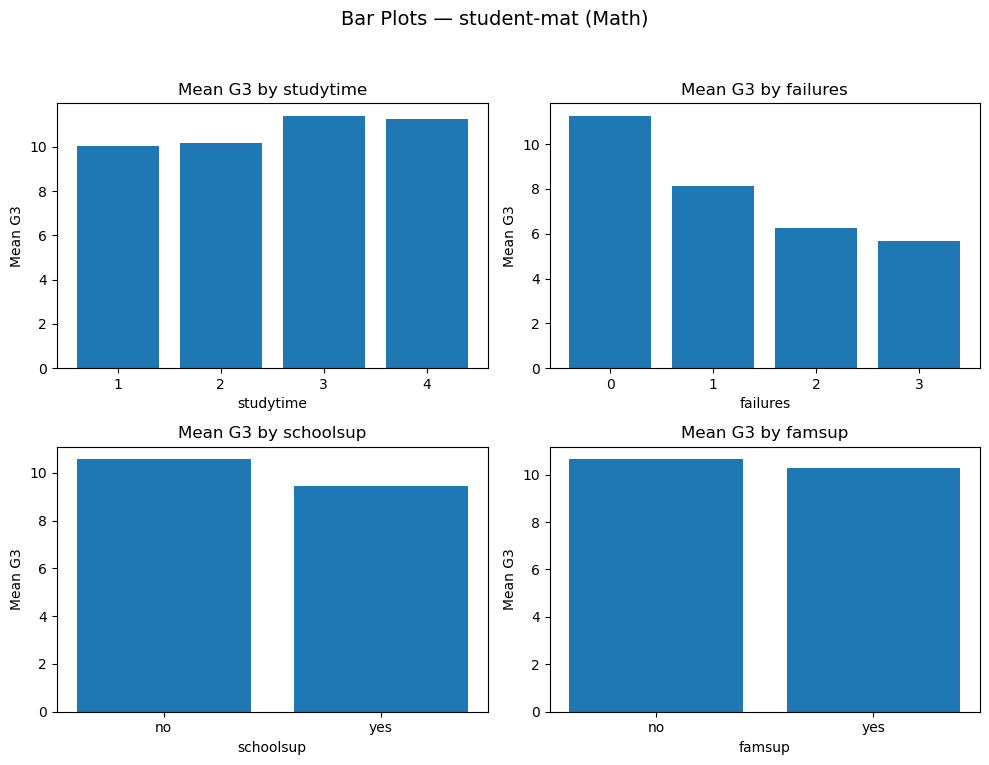

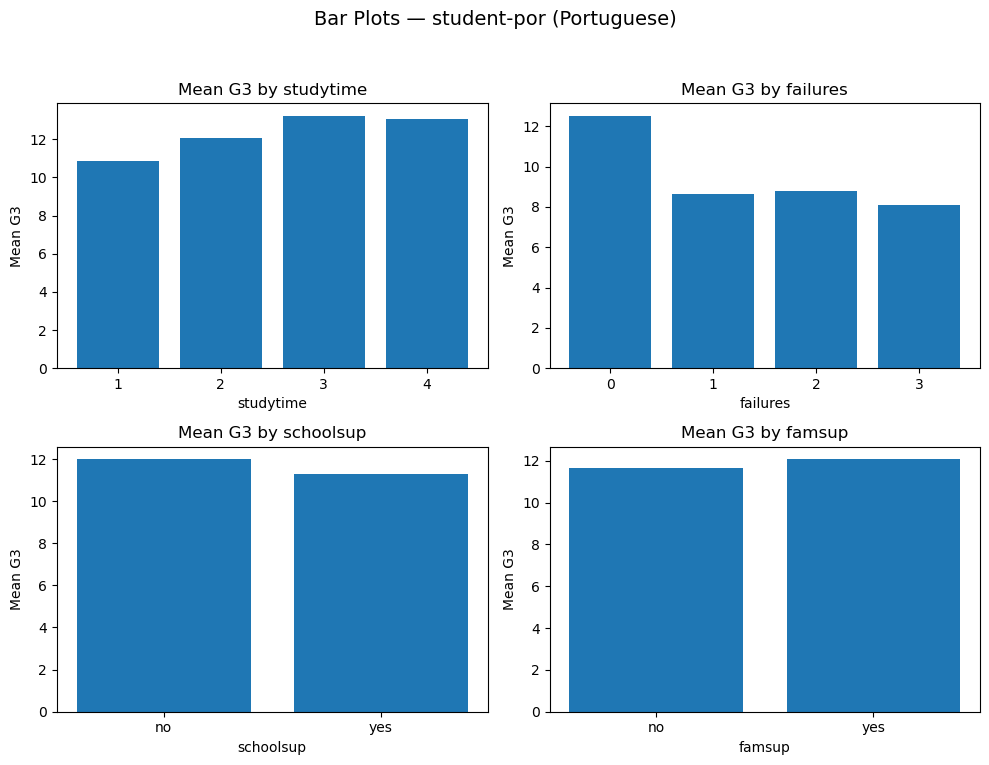

In [20]:
def bar_plots_for_dataset(df, title_prefix):
    """Create bar plots of mean G3 across several categorical/ordinal attributes."""
    # Attributes chosen: studytime, failures, schoolsup, famsup
    attributes = ['studytime', 'failures', 'schoolsup', 'famsup']
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    axes = axes.ravel()

    for i, attr in enumerate(attributes):
        ax = axes[i]
        # Compute mean G3 by attribute category
        grouped = df.groupby(attr)['G3'].mean()
        ax.bar(grouped.index.astype(str), grouped.values)
        ax.set_title(f"Mean G3 by {attr}")
        ax.set_xlabel(attr)
        ax.set_ylabel('Mean G3')

    fig.suptitle(f"Bar Plots — {title_prefix}", fontsize=14)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

bar_plots_for_dataset(mat_df, 'student-mat (Math)')
bar_plots_for_dataset(por_df, 'student-por (Portuguese)')

### Interpretation — Bar Plots

For each dataset, we plotted the mean final grade G3 grouped by four attributes: studytime, failures, schoolsup (school educational support), and famsup (family educational support).

**Key takeaways (typical patterns):**

- Students with higher studytime levels tend to show higher average final grades, although the trend may not be perfectly linear.
- Students with more past failures typically have lower mean grades, which makes intuitive sense.
- For schoolsup and famsup, the average grades for students receiving support vs. not receiving support show how extra resources may (or may not) translate into performance differences.

Overall, these bar plots highlight how study behavior and support variables relate to final grade outcomes in both subjects.


## Statistic Task 4 — Line Plots for Selected Attributes

**Goal:** For each dataset:

- Select four attributes and plot them using line plots.
- Here we examine how average grades vary with age and compare grade components.


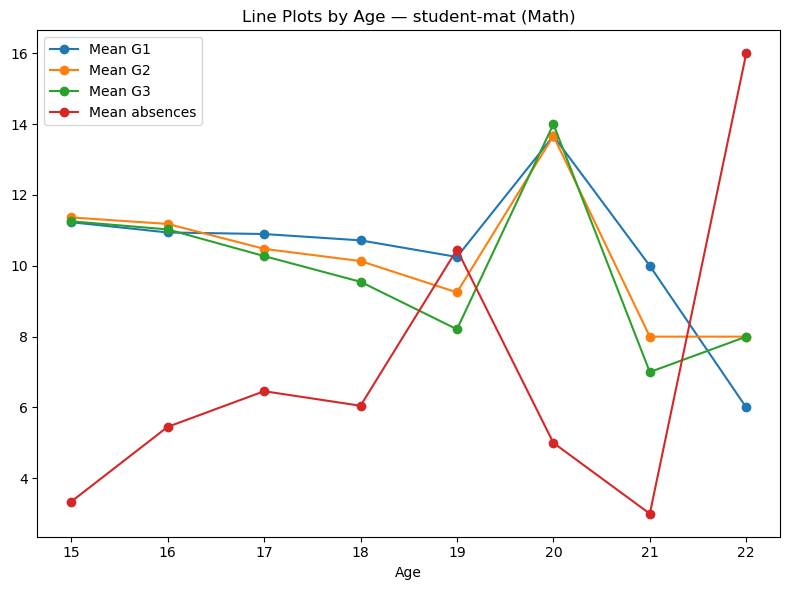

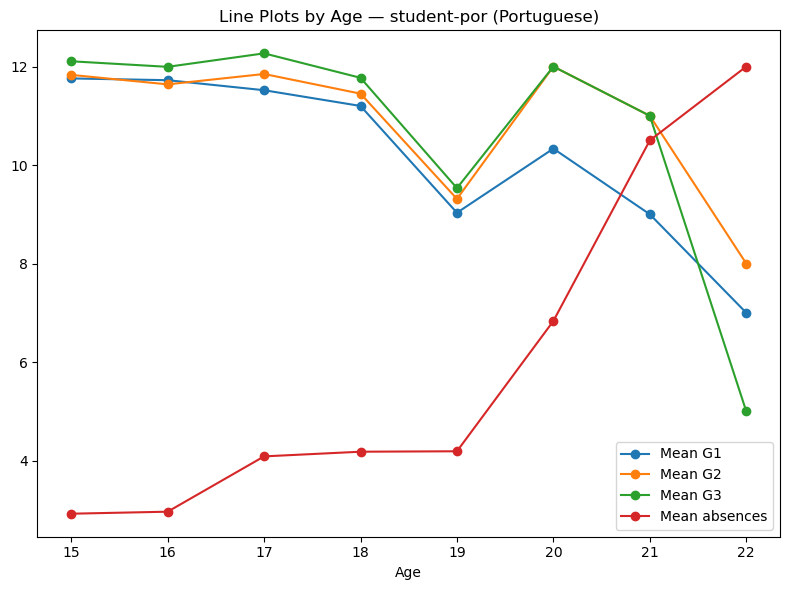

In [22]:
def line_plots_for_dataset(df, title_prefix):
    """Plot line charts of average grades and absences as a function of age."""
    # We use age on the x-axis and plot mean G1, G2, G3, and absences
    age_group = df.groupby('age')[['G1', 'G2', 'G3', 'absences']].mean()

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(age_group.index, age_group['G1'], marker='o', label='Mean G1')
    ax.plot(age_group.index, age_group['G2'], marker='o', label='Mean G2')
    ax.plot(age_group.index, age_group['G3'], marker='o', label='Mean G3')
    ax.plot(age_group.index, age_group['absences'], marker='o', label='Mean absences')

    ax.set_xlabel('Age')
    ax.set_title(f"Line Plots by Age — {title_prefix}")
    ax.legend()
    plt.tight_layout()
    plt.show()

line_plots_for_dataset(mat_df, 'student-mat (Math)')
line_plots_for_dataset(por_df, 'student-por (Portuguese)')

### Interpretation — Line Plots by Age

- These plots show how average grades (G1, G2, G3) and absences change across different age groups.
- In many cases, grades fluctuate slightly with age but remain within a similar range, reflecting that the datasets cover a relatively narrow age band (mostly high school years).
- Mean absences may increase for some age groups, suggesting that older students might miss school more often, which could in turn affect performance.

The main takeaway is that age alone does not drastically separate grade outcomes, but it interacts with other behavioral variables such as absences.


## Data Mining Task 1 — Decision Tree (student-mat.csv)

**Goal:** Use a **Decision Tree classifier** to extract interpretable rules about grade classification for the `student-mat` dataset.

- We define a binary target variable pass_math based on final grade G3:
  - 1 if G3 ≥ 12 (passed),
  - 0 otherwise (did not pass).
- We use a small set of features to keep the tree interpretable:
  - studytime, failures, absences, G1, G2.
- We set the maximum depth of the tree to 4 to limit complexity and extract understandable rules.


Decision Tree accuracy on test set (math): 0.9327731092436975


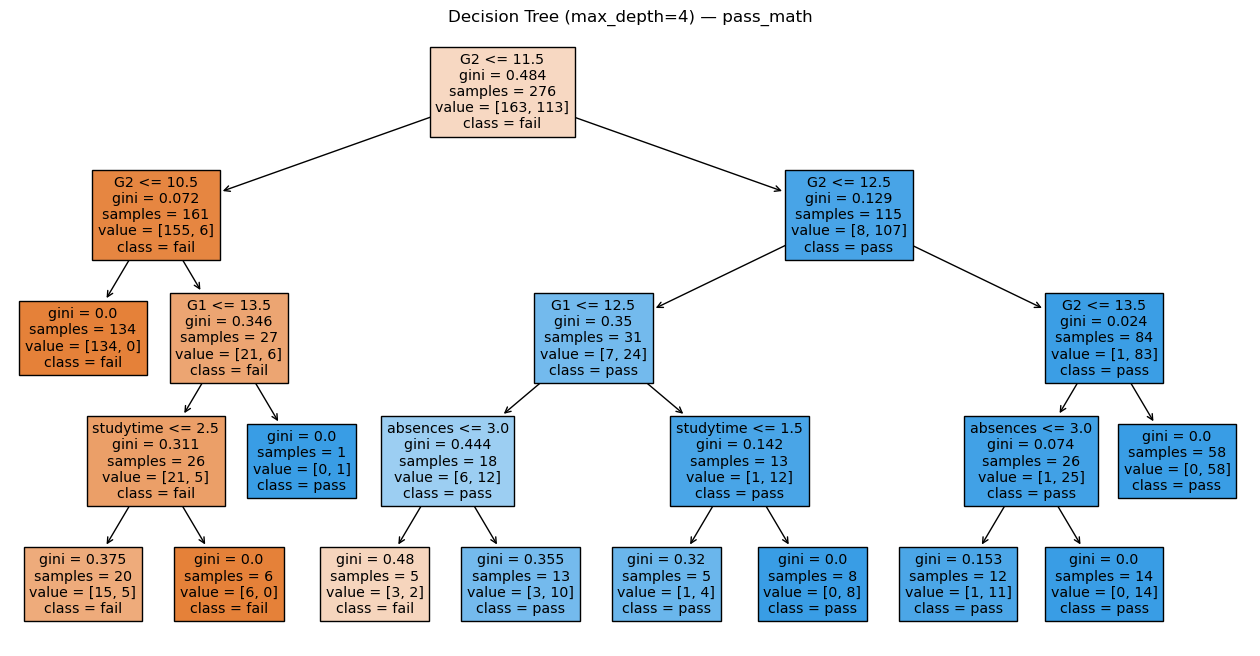

In [26]:
# Create binary target for math
mat_df = mat_df.copy()
mat_df['pass_math'] = (mat_df['G3'] >= 12).astype(int)

# Features and target
X_mat = mat_df[['studytime', 'failures', 'absences', 'G1', 'G2']]
y_mat = mat_df['pass_math']

# Split into train and test sets
X_train_mat, X_test_mat, y_train_mat, y_test_mat = train_test_split(
    X_mat, y_mat, test_size=0.3, random_state=42, stratify=y_mat
)

# Train Decision Tree classifier with max depth 4
dt_clf = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_clf.fit(X_train_mat, y_train_mat)

# Evaluate accuracy
y_pred_mat = dt_clf.predict(X_test_mat)
acc_mat = accuracy_score(y_test_mat, y_pred_mat)
print("Decision Tree accuracy on test set (math):", acc_mat)

# Visualize the tree
plt.figure(figsize=(16, 8))
plot_tree(dt_clf, feature_names=X_mat.columns, class_names=['fail', 'pass'], filled=True)
plt.title('Decision Tree (max_depth=4) — pass_math')
plt.show()

### Interpretation — Decision Tree Rules for Math Grades

- The decision tree splits primarily on G2 and G1, which makes sense because these are earlier-period grades and strongly predict final performance.
- Other features like failures, studytime, and absences appear in deeper splits, refining the classification for borderline cases.
- The extracted rules can be read directly from the tree diagram, e.g. (example pattern):
  - If G2 is high and there are no past failures, the student is very likely to pass.
  - If G2 is low and there are multiple failures or high absences, the student is much more likely to fail.
- Overall, the tree provides a human-readable model linking intermediate performance and behavior to the final pass/fail outcome.


## Data Mining Task 2 — Naive Bayes (student-por.csv)

We now work with the **Portuguese** dataset and apply Naive Bayes models.

### Task 2.1 — Binary Target `passed` Based on G3

- We create a binary variable passed:
  - 1 if G3 ≥ 12 (passed),
  - 0 otherwise (failed).
- We then show the **class distribution** (% passed vs. % failed).


Class distribution (passed vs failed) in %:
passed
1    53.620955
0    46.379045
Name: proportion, dtype: float64


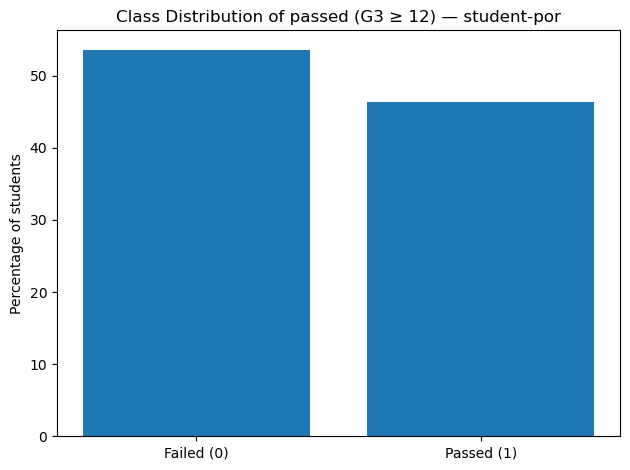

In [28]:
# Create binary target for Portuguese
por_df = por_df.copy()
por_df['passed'] = (por_df['G3'] >= 12).astype(int)

class_counts = por_df['passed'].value_counts(normalize=True) * 100
print("Class distribution (passed vs failed) in %:")
print(class_counts)

fig, ax = plt.subplots()
ax.bar(class_counts.index.astype(str), class_counts.values)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Failed (0)', 'Passed (1)'])
ax.set_ylabel('Percentage of students')
ax.set_title('Class Distribution of passed (G3 ≥ 12) — student-por')
plt.tight_layout()
plt.show()

### Interpretation — Class Distribution

- The bar chart shows the **percentage of students who passed vs. failed** based on the rule G3 ≥ 12.
- Typically, the passing group is larger than the failing group, but the imbalance is not extreme. This matters because strong class imbalance can make classification harder or misleading.
- This simple summary already gives an idea of course difficulty and overall success rate in the Portuguese class.


### Task 2.2 — Gaussian Naive Bayes: Predict `passed` (G3-based) Using `studytime`, `absences`, and `G1`

- We now try to **predict whether a student passes the course** using:
  - studytime (weekly study time),
  - absences (number of absences),
  - G1 (first period grade).
- We use a **Gaussian Naive Bayes** classifier and evaluate it on a held-out test set.
- We visualize the results with:
  - A **scatter plot** comparing true vs. predicted class labels.
  - A **confusion matrix** plot.


Gaussian Naive Bayes accuracy (Portuguese, passed vs failed): 0.8256410256410256

Classification report:
               precision    recall  f1-score   support

           0       0.77      0.88      0.82        90
           1       0.88      0.78      0.83       105

    accuracy                           0.83       195
   macro avg       0.83      0.83      0.83       195
weighted avg       0.83      0.83      0.83       195



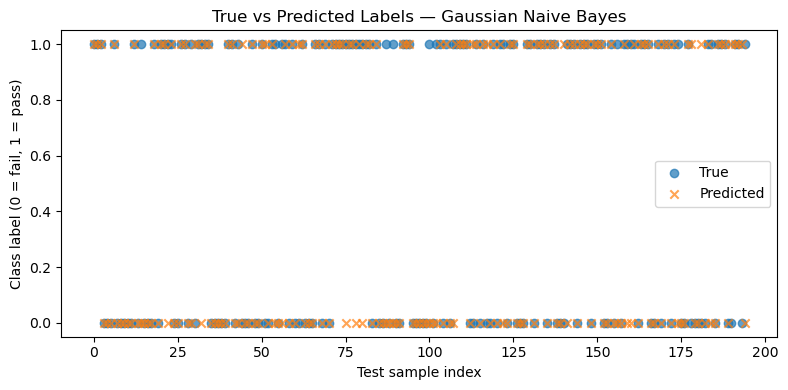

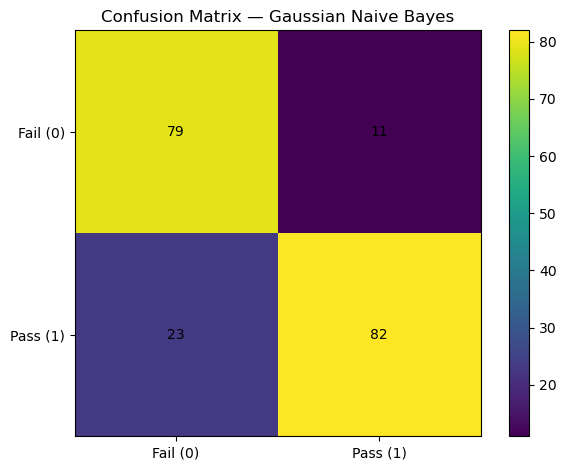

In [32]:
# Features and target for Naive Bayes
X_por_nb = por_df[['studytime', 'absences', 'G1']]
y_por_nb = por_df['passed']

X_train_por, X_test_por, y_train_por, y_test_por = train_test_split(
    X_por_nb, y_por_nb, test_size=0.3, random_state=42, stratify=y_por_nb
)

# Train Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_por, y_train_por)

y_pred_por = gnb.predict(X_test_por)
acc_por = accuracy_score(y_test_por, y_pred_por)
print("Gaussian Naive Bayes accuracy (Portuguese, passed vs failed):", acc_por)
print("\nClassification report:\n", classification_report(y_test_por, y_pred_por))

# Scatter plot: true vs predicted labels by sample index
fig, ax = plt.subplots(figsize=(8, 4))
indices = np.arange(len(y_test_por))
ax.scatter(indices, y_test_por, marker='o', label='True', alpha=0.7)
ax.scatter(indices, y_pred_por, marker='x', label='Predicted', alpha=0.7)
ax.set_xlabel('Test sample index')
ax.set_ylabel('Class label (0 = fail, 1 = pass)')
ax.set_title('True vs Predicted Labels — Gaussian Naive Bayes')
ax.legend()
plt.tight_layout()
plt.show()

# Confusion matrix
cm = confusion_matrix(y_test_por, y_pred_por)
fig, ax = plt.subplots()
cax = ax.imshow(cm, interpolation='nearest')
ax.set_title('Confusion Matrix — Gaussian Naive Bayes')
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['Fail (0)', 'Pass (1)'])
ax.set_yticklabels(['Fail (0)', 'Pass (1)'])
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha='center', va='center')
fig.colorbar(cax)
plt.tight_layout()
plt.show()

### Interpretation — Naive Bayes Pass/Fail Prediction

- The **accuracy** and classification report indicate how well studytime, absences, and G1 together predict the final pass/fail outcome.
- The **scatter plot** shows where the model’s predictions match (same value) or differ (0 vs 1) from the true labels.
- The **confusion matrix** summarizes:
  - True negatives (correctly predicted fails),
  - True positives (correctly predicted passes),
  - False positives and false negatives.
- Because Naive Bayes assumes **feature independence** and uses relatively simple probability models, it is fast and often performs reasonably well, but it may misclassify borderline students whose behavior does not fit the average pattern.


### Task 2.3 — Multinomial Naive Bayes: Predict Grade Levels (Low / Medium / High) for G3

- We now categorize the final grade G3 into **three levels**:
  - 0 = **Low** (G3 < 10),
  - 1 = **Medium** (10 ≤ G3 < 14),
  - 2 = **High** (G3 ≥ 14).
- We use the following **discrete features** as predictors:
  - studytime (1–4),
  - failures (0–3),
  - schoolsup (yes/no),
  - famsup (yes/no),
  - activities (yes/no).
- We encode the yes/no variables as 0/1 and train a **Multinomial Naive Bayes** classifier.
- Finally, we plot the **confusion matrix** for the three grade levels.


Multinomial Naive Bayes accuracy (grade levels): 0.5384615384615384

Classification report:
               precision    recall  f1-score   support

           0       0.33      0.07      0.11        30
           1       0.54      0.96      0.70       107
           2       0.00      0.00      0.00        58

    accuracy                           0.54       195
   macro avg       0.29      0.34      0.27       195
weighted avg       0.35      0.54      0.40       195



D:\Anaconda_Python_CS\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda_Python_CS\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda_Python_CS\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


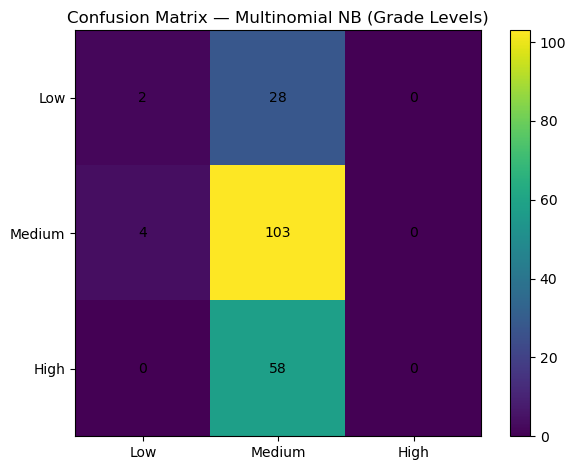

In [36]:
# Define grade level categories
def grade_level(g3):
    """Map numeric G3 into 0=Low, 1=Medium, 2=High."""
    if g3 < 10:
        return 0
    elif g3 < 14:
        return 1
    else:
        return 2

por_df['grade_level'] = por_df['G3'].apply(grade_level)

# Prepare features
X_mult = por_df[['studytime', 'failures', 'schoolsup', 'famsup', 'activities']].copy()

# Encode yes/no as 0/1
for col in ['schoolsup', 'famsup', 'activities']:
    X_mult[col] = (X_mult[col] == 'yes').astype(int)

y_mult = por_df['grade_level']

X_train_mult, X_test_mult, y_train_mult, y_test_mult = train_test_split(
    X_mult, y_mult, test_size=0.3, random_state=42, stratify=y_mult
)

mnb = MultinomialNB()
mnb.fit(X_train_mult, y_train_mult)

y_pred_mult = mnb.predict(X_test_mult)
acc_mult = accuracy_score(y_test_mult, y_pred_mult)
print("Multinomial Naive Bayes accuracy (grade levels):", acc_mult)
print("\nClassification report:\n", classification_report(y_test_mult, y_pred_mult))

# Confusion matrix
cm_mult = confusion_matrix(y_test_mult, y_pred_mult)
fig, ax = plt.subplots()
cax = ax.imshow(cm_mult, interpolation='nearest')
ax.set_title('Confusion Matrix — Multinomial NB (Grade Levels)')
ax.set_xticks([0, 1, 2])
ax.set_yticks([0, 1, 2])
ax.set_xticklabels(['Low', 'Medium', 'High'])
ax.set_yticklabels(['Low', 'Medium', 'High'])
for i in range(cm_mult.shape[0]):
    for j in range(cm_mult.shape[1]):
        ax.text(j, i, cm_mult[i, j], ha='center', va='center')
fig.colorbar(cax)
plt.tight_layout()
plt.show()

### Interpretation — Multinomial Naive Bayes for Grade Levels

- The model attempts to predict whether a student’s final grade is **low**, **medium**, or **high** using only a small set of behavioral and support-related variables.
- The **accuracy** and classification report show how well the model distinguishes between the three grade levels.
- The **confusion matrix** reveals where the model tends to make mistakes, for example:
  - Confusing **medium** and **high** grades if their feature patterns are similar.
  - Distinguishing **low** performers more easily if they have many failures or very low study time.
- Because Multinomial Naive Bayes assumes that features contribute independently to the class and treats them as counts, it provides a simple baseline for multi-class grade prediction.
